In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [40]:
file_path = 'C:/Users/91741/air_quality_prediction/AirQualityUCI.xlsx'
data = pd.read_excel(file_path)

In [41]:
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())

First few rows of the dataset:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  

In [42]:
data.replace(-200, np.nan, inplace=True)
data.dropna(inplace=True)

In [43]:
data['DateTime'] = pd.to_datetime(data['Date'].astype(str) + ' ' + data['Time'].astype(str))

In [44]:
data['Hour'] = data['DateTime'].dt.hour
data['Month'] = data['DateTime'].dt.month
data['DayOfWeek'] = data['DateTime'].dt.dayofweek

In [45]:
data.drop(columns=['Date', 'Time', 'DateTime'], inplace=True)

In [46]:
# Save the cleaned dataset to the absolute path
data.to_csv('C:/Users/91741/air-quality-detector/data/cleaned_air_quality.csv', index=False)

# Update the print statement to reflect the correct path
print("\nCleaned dataset saved to 'C:/Users/91741/air_quality_prediction/data/cleaned_air_quality.csv'.")


Cleaned dataset saved to 'C:/Users/91741/air_quality_prediction/data/cleaned_air_quality.csv'.


In [47]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
           CO(GT)  PT08.S1(CO)     NMHC(GT)    C6H6(GT)  PT08.S2(NMHC)  \
count  827.000000   827.000000   827.000000  827.000000     827.000000   
mean     2.353567  1207.741838   231.025393   10.772367     965.983777   
std      1.409496   241.826753   208.461912    7.417127     266.413137   
min      0.300000   752.500000     7.000000    0.542781     447.500000   
25%      1.300000  1016.875000    77.000000    4.804320     753.500000   
50%      2.000000  1172.000000   157.000000    9.125831     944.250000   
75%      3.100000  1380.250000   318.500000   14.803204    1142.375000   
max      8.100000  2039.750000  1189.000000   39.202340    1754.250000   

          NOx(GT)  PT08.S3(NOx)     NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  827.000000    827.000000  827.000000    827.000000   827.000000   
mean   143.501814    963.178053  100.259976   1600.506550  1045.691052   
std     81.829717    265.906153   31.493823    302.290036   400.130277   
min     12.00000

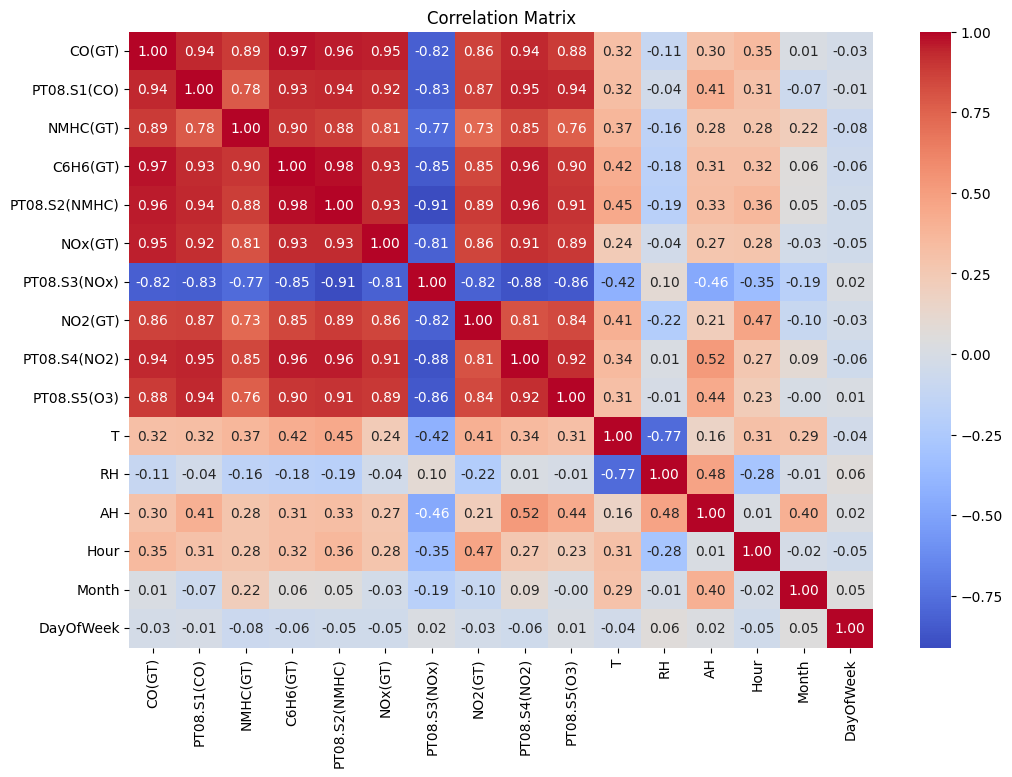

In [50]:
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('C:/Users/91741/air-quality-detector/data/correlation_matrix.png')  
plt.show()

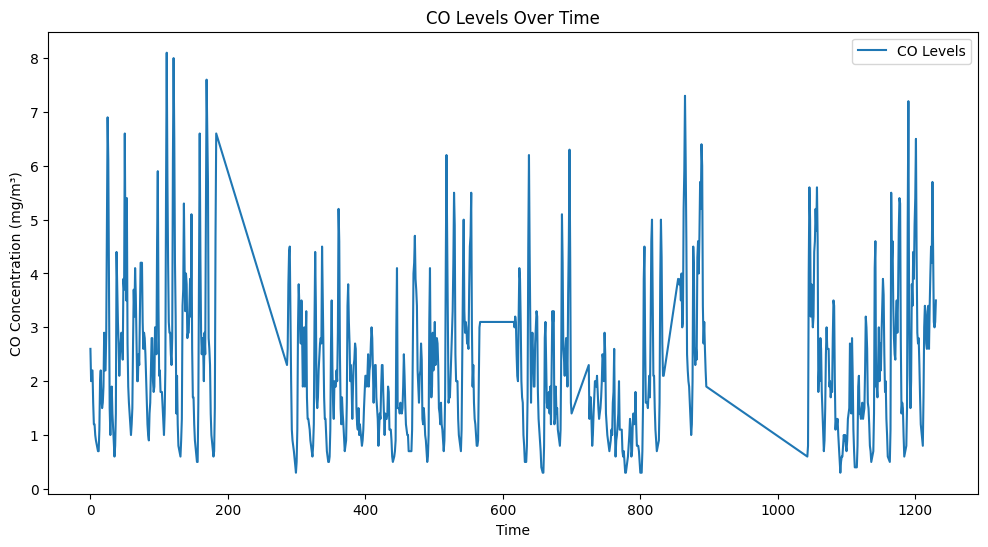

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['CO(GT)'], label='CO Levels')
plt.xlabel('Time')
plt.ylabel('CO Concentration (mg/m³)')
plt.title('CO Levels Over Time')
plt.legend()
plt.savefig('C:/Users/91741/air-quality-detector/data/co_levels_over_time.png')  
plt.show()

In [56]:
features = ['PT08.S1(CO)', 'NMHC(GT)', 'NOx(GT)', 'NO2(GT)', 'PT08.S3(NOx)', 'T', 'RH', 'AH', 'Hour', 'Month', 'DayOfWeek']
X = data[features]
y = data['CO(GT)']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
print("\nModel Evaluation:")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
print("R²:", r2_score(y_test, y_pred))


Model Evaluation:
RMSE: 0.29390653183431126
R²: 0.9585034966832751


In [64]:
joblib.dump(model, 'C:/Users/91741/air-quality-detector/models/air_quality_model.pkl')
print("\nModel saved to 'C:/Users/91741/air-quality-detector/models/air_quality_model.pkl'.")


Model saved to 'C:/Users/91741/air-quality-detector/models/air_quality_model.pkl'.
